<a href="https://colab.research.google.com/github/DonAtharva/Car-Safety-Prediction-using-Random-Forest-Classifier/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

#EXPLORATORY DATA ANALYSIS

In [245]:
df = pd.read_csv("car_evaluation.csv")

In [246]:
df.shape

(1727, 7)

In [247]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [248]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [249]:
wow = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = [wow]

In [250]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   (buying,)    1727 non-null   object
 1   (maint,)     1727 non-null   object
 2   (doors,)     1727 non-null   object
 3   (persons,)   1727 non-null   object
 4   (lug_boot,)  1727 non-null   object
 5   (safety,)    1727 non-null   object
 6   (class,)     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#CHECKING MISSING VALUES

In [252]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


#DECLARING THE INDEPENDENT AND TARGET VARIABLE

In [253]:
X = df.drop(['class'], axis=1)
y = df['class']

/tmp/ipython-input-3354567352.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(['class'], axis=1)


#SPLITTING THE DATA INTO TRAINING AND TESTING

In [254]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.30, random_state=42)

In [255]:
X_train.shape, X_test.shape

((519, 6), (1208, 6))

#ENCODING

In [256]:
import category_encoders as ce

In [257]:
encoder = ce.OrdinalEncoder(cols=[('buying',), ('maint',), ('doors',), ('persons',), ('lug_boot',), ('safety',)])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [258]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
599,1,1,1,1,1,1
932,2,2,1,2,1,1
628,1,1,2,1,1,2
1497,3,1,2,2,2,3
1262,2,3,1,3,2,1


#RANDOM FOREST CLASSIFIER MODEL

In [259]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [260]:
ytest_pred = rfc.predict(X_test)
ytrain_pred = rfc.predict(X_train)

#FINDING AND VISUALING THE IMPORTANT FEATURES

In [261]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.275621
persons,0.262811
buying,0.161812
maint,0.138679
lug_boot,0.081542
doors,0.079535


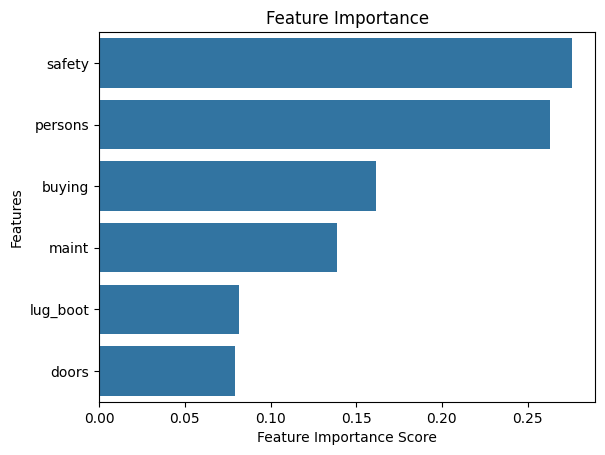

In [262]:
sns.barplot(x=feature_scores, y=[col[0] for col in feature_scores.index])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

#ACCURACY SCORES

In [263]:
print(f"Train Accuracy: {rfc.score(X_train, y_train)}")

Train Accuracy: 1.0


In [264]:
print(f"Model Accuracy Score: {rfc.score(X_test, y_test)}")

Model Accuracy Score: 0.9230132450331126


#CONFUSION MATRIX

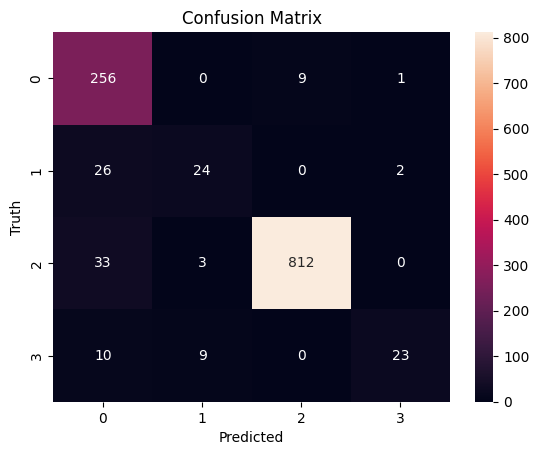

In [265]:
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, fmt='d',)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

#HYPERPARAMETERS

In [266]:
from scipy.stats import randint
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': randint(5, 20),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20),
              'max_features': ['sqrt', 'log2', None]}
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(random_search.best_params_)

Best hyperparameters found:
{'max_depth': 16, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [268]:
best_rfc = RandomForestClassifier(random_state=0, **random_search.best_params_)
best_rfc.fit(X_train, y_train)

print("Accuracy of the model with best hyperparameters on the test set:")
print(best_rfc.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of the model with best hyperparameters on the test set:
0.918046357615894


#CONCLUSION

In [267]:
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         acc       0.79      0.96      0.87       266
        good       0.67      0.46      0.55        52
       unacc       0.99      0.96      0.97       848
       vgood       0.88      0.55      0.68        42

    accuracy                           0.92      1208
   macro avg       0.83      0.73      0.77      1208
weighted avg       0.93      0.92      0.92      1208



In this project, I build a Random Forest Classifier to predict the safety of the car.
I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.

Also based on the accuracy on the test set, the original model (accuracy ~0.923) performed slightly better than the model after hyperparameter tuning (accuracy ~0.918).

The Random Forest Classifier appears to be a suitable model for this classification task, providing good accuracy. While hyperparameter tuning in this instance did not lead to improved overall accuracy, further analysis of the classification report and confusion matrix for both models could provide deeper insights into their performance on individual classes. The feature importance analysis also highlights the key factors influencing car evaluations in this dataset.